In [2]:
import os, sys
sys.path.append("../")

import numpy as np
import matplotlib.pyplot as plt
from tqdm import *
import matplotlib
import matplotlib.pylab as pylab

# sys.path.append('/Users/smsharma/heptools/colossus/')

from colossus.cosmology import cosmology
from colossus.lss import mass_function

from theory.spec_calc import PowerSpectra, PowerSpectraPopulations
from theory.astrometry_forecast import Parameter, AstrometryObservation, FisherForecast
from theory.kink import MassFunctionKink, Sigma
from theory.units import *

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [13]:
from plot_params import params

pylab.rcParams.update(params)
plots_dir = "/Users/smsharma/Dropbox/Projects/LensPowerSpectra/LensPower/Draft/plots/"

save_figs = True

cols_default = plt.rcParams['axes.prop_cycle'].by_key()['color']

/Users/smsharma/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/Users/smsharma/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


## Fig. 7: kinked primordial/matter power spectra and halo mass function

Analyze cluster runs.

In [6]:
def P(k, k_B, n_B, n_s=0.9665, A_s=2.105 / 1e9, k_0=0.05) :
    if k < k_B:
        return A_s * (k / k_0) ** (n_s - 1)
    else:
        return A_s * (k_B /k_0) ** (n_s - 1) * (k / k_B) ** (n_B - 1)


In [7]:
n_B_ary = np.linspace(1, 3, 11)
k_B_ary = np.logspace(np.log10(5), np.log10(50), 11)

print(n_B_ary)
print(k_B_ary)

[1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3. ]
[ 5.          6.29462706  7.92446596  9.97631157 12.55943216 15.8113883
 19.90535853 25.05936168 31.54786722 39.71641174 50.        ]


In [8]:
k_B_plot_ary = [k_B_ary[-1], k_B_ary[4], k_B_ary[4]]
n_B_plot_ary = [n_B_ary[0], 2., 3.]
M_min = 1e1

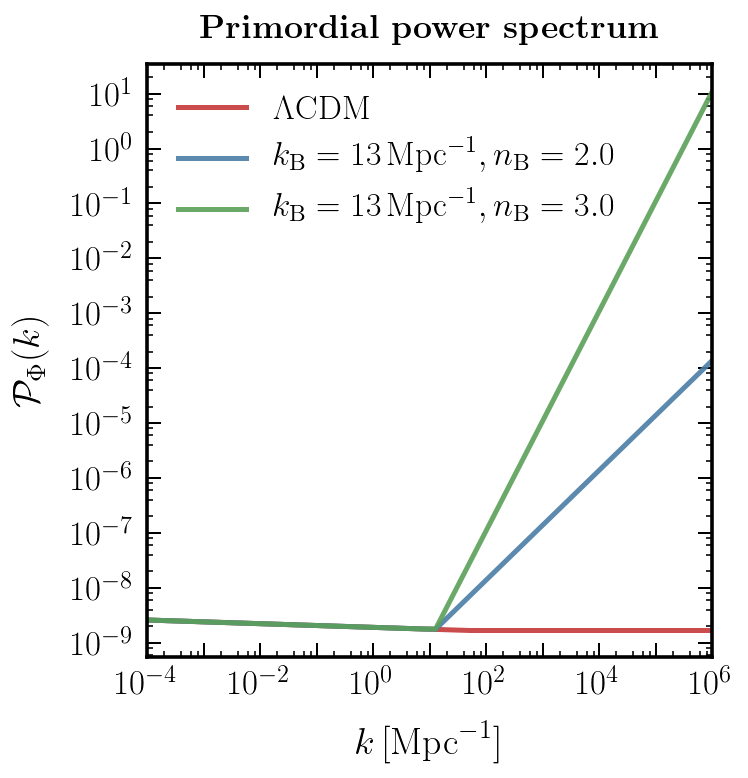

In [50]:
matplotlib.rcParams['figure.figsize'] = 5.3, 5.5
    
fig, ax = plt.subplots()

k_ary = np.logspace(-4, 6)
for i, (k_B, n_B) in enumerate(zip(k_B_plot_ary, n_B_plot_ary)):
    Pk_ary = [P(k, k_B, n_B) for k in k_ary]
    label = '$k_\mathrm{B} = ' + str(round(k_B))[:2] + '$\,Mpc$^{-1}, n_\mathrm{B} = ' + str(n_B) + '$'
    if n_B == 1.: label = "$\Lambda$CDM"
    plt.plot(k_ary, Pk_ary, label= label)
    
plt.xscale("log")
plt.yscale("log")

plt.xlabel("$k\,[\mathrm{Mpc}^{-1}]$")
plt.ylabel("$\mathcal P_\Phi(k)$")

plt.xlim(min(k_ary), max(k_ary))

plt.title('\\textbf{Primordial power spectrum}', y = 1.02, fontsize=17)

plt.legend()

# Tick tweaks 

locmaj = matplotlib.ticker.LogLocator(base=10,numticks=12) 
ax.xaxis.set_major_locator(locmaj)

locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=12)
ax.xaxis.set_minor_locator(locmin)
ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

locmaj = matplotlib.ticker.LogLocator(base=10,numticks=12) 
ax.yaxis.set_major_locator(locmaj)

locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=12)
ax.yaxis.set_minor_locator(locmin)
ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

every_nth = 2
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 1:
        label.set_visible(False)

plt.tight_layout()
plt.savefig(plots_dir + "primordial_kinked.pdf")

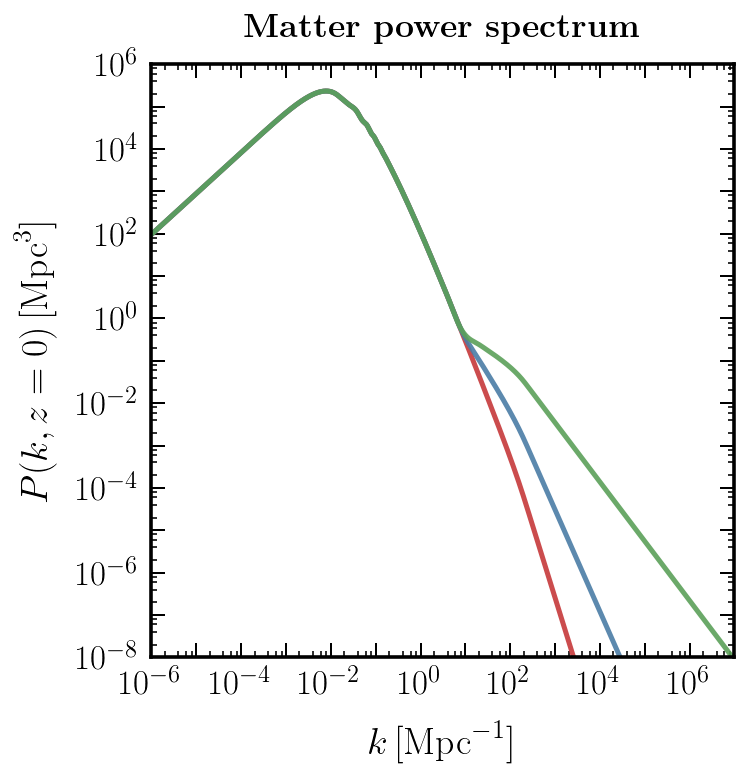

In [48]:
matplotlib.rcParams['figure.figsize'] = 5.3, 5.5

fig, ax = plt.subplots()

for i, (k_B, n_B) in enumerate(zip(k_B_plot_ary, n_B_plot_ary)):

    filename = "../data/arrays/pk/pk" + str(k_B) + "_" + str(n_B) + "_" + str(M_min) +  ".dat"
    npz = np.loadtxt(filename)

    plt.plot(10 ** npz[:,0], 10 ** npz[:,1])
    plt.xscale("log")
    plt.yscale("log")
    
plt.xlim(1e-6,10 ** 7)
plt.ylim(1e-8,1e6)

plt.xlabel("$k\,[\mathrm{Mpc}^{-1}]$")
plt.ylabel("$ P(k, z=0)\,[\mathrm{Mpc}^3]$")

plt.title('\\textbf{Matter power spectrum}', y = 1.02, fontsize=17)

# Tick tweaks 

locmaj = matplotlib.ticker.LogLocator(base=10,numticks=24) 
ax.xaxis.set_major_locator(locmaj)

locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=14)
ax.xaxis.set_minor_locator(locmin)
ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

locmaj = matplotlib.ticker.LogLocator(base=10,numticks=24) 
ax.yaxis.set_major_locator(locmaj)

locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=14)
ax.yaxis.set_minor_locator(locmin)
ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

every_nth = 2
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 1:
        label.set_visible(False)
for n, label in enumerate(ax.yaxis.get_ticklabels()):
    if n % every_nth != 1:
        label.set_visible(False)


plt.tight_layout()
plt.savefig(plots_dir + "matterpower_kinked.pdf")

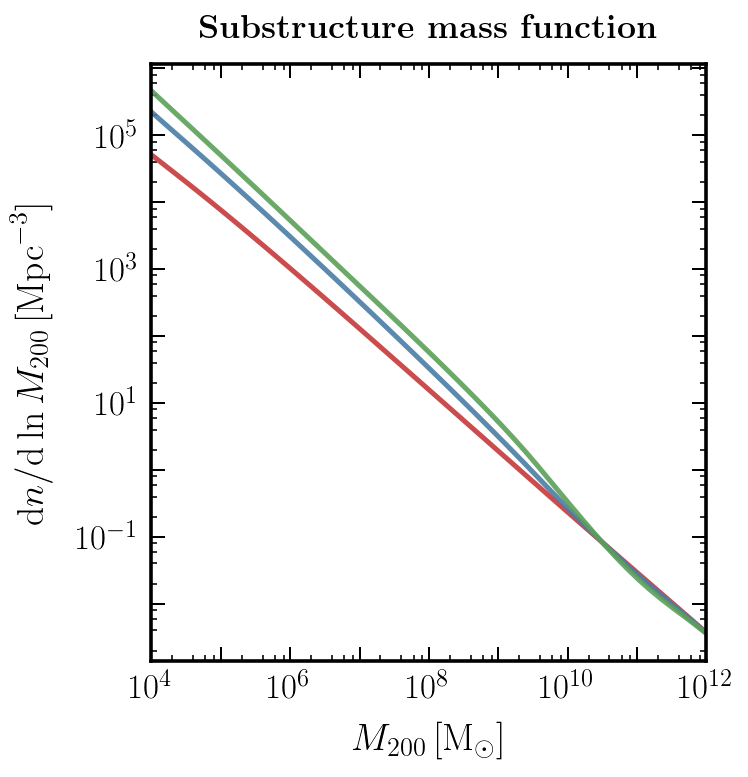

In [49]:
matplotlib.rcParams['figure.figsize'] = 5.3, 5.5

fig, ax = plt.subplots()

for i, (k_B, n_B) in enumerate(zip(k_B_plot_ary, n_B_plot_ary)):

    filename = "../theory/cluster/cluster_out/calib_" + str(k_B) + "_" + str(n_B) + "_" + str(M_min) +  ".npz"
    npz = np.load(filename)

    plt.plot(npz['M_ary'], npz['dndlnM_ary'])
plt.xscale("log")
plt.yscale("log")
plt.xlim(min(npz['M_ary']), max(npz['M_ary']))

plt.xlabel("$M_{200}\,[\mathrm M_\odot]$")
plt.ylabel("$\mathrm{d}n/\mathrm{d}\ln M_{200}\,[\mathrm{Mpc}^{-3}]$")

plt.title('\\textbf{Substructure mass function}', y = 1.02, fontsize=17)

# Tick tweaks 

locmaj = matplotlib.ticker.LogLocator(base=10,numticks=24) 
ax.xaxis.set_major_locator(locmaj)

locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=14)
ax.xaxis.set_minor_locator(locmin)
ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

locmaj = matplotlib.ticker.LogLocator(base=10,numticks=24) 
ax.yaxis.set_major_locator(locmaj)

locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=14)
ax.yaxis.set_minor_locator(locmin)
ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

every_nth = 2
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 1:
        label.set_visible(False)
for n, label in enumerate(ax.yaxis.get_ticklabels()):
    if n % every_nth != 1:
        label.set_visible(False)


plt.tight_layout()
plt.savefig(plots_dir + "massfunction_kinked.pdf")

## Fig. 8: sensitivity to kinks

In [9]:
# M_min = 1e1
n_B_ary = np.linspace(1, 3, 11)
k_B_ary = np.logspace(np.log10(5), np.log10(50), 11)

sens_ska_ary = np.zeros((len(n_B_ary), len(k_B_ary)))
sens_wfirst_ary = np.zeros((len(n_B_ary), len(k_B_ary)))
sens_gaia_ary = np.zeros((len(n_B_ary), len(k_B_ary)))

for i_n_B, n_B in enumerate((tqdm_notebook(n_B_ary))):
    for i_k_B, k_B in enumerate((k_B_ary)):
        filename = "../theory/cluster/cluster_out/calib_" + str(k_B) + "_" + str(n_B) + "_" + str(M_min) +  ".npz"
        if not os.path.isfile(filename): continue
        npz = np.load(filename)

        sens_ska_ary[i_n_B, i_k_B] = npz['sig_ska'][0]# get_sens(C_l_mu, C_l_alpha, f_sky=0.05, sigma_mu=10000, sigma_alpha=10, l_max=lmax, l_max_alpha=lmax, l_max_mu=lmax)[1]
        sens_wfirst_ary[i_n_B, i_k_B] = npz['sig_wfirst'][0]# get_sens(C_l_mu, C_l_alpha, f_sky=0.05, sigma_mu=10000, sigma_alpha=10, l_max=lmax, l_max_alpha=lmax, l_max_mu=lmax)[1]
        sens_gaia_ary[i_n_B, i_k_B] = npz['sig_gaia'][0]# get_sens(C_l_mu, C_l_alpha, f_sky=0.05, sigma_mu=10000, sigma_alpha=10, l_max=lmax, l_max_alpha=lmax, l_max_mu=lmax)[1]

/Users/smsharma/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if __name__ == '__main__':


In [10]:
matplotlib.rcParams['figure.figsize'] = 6, 5.5
# fig, ax = plt.subplots()


X, Y = np.meshgrid(np.log10(k_B_ary), n_B_ary)

# plt.contourf(X, Y, sens_ska_ary, levels = [0,1], linestyles=['-'], linewidths=2, alpha=0.05, colors='grey', label='WFIRST-like')
CS1 = plt.contour(X, Y, sens_ska_ary, levels = [1], linestyles=['-'], linewidths=2, alpha=0.8, colors='grey', label='WFIRST-like');

# plt.contourf(X, Y, sens_wfirst_ary, levels = [0,1], linestyles=['-'], linewidths=2, alpha=0.05, colors='firebrick', label='WFIRST-like')
CS2 = plt.contour(X, Y, sens_wfirst_ary, levels = [1], linestyles=['-'],linewidths=2, alpha=0.8, colors='firebrick', label='WFIRST-like');

# plt.contourf(X, Y, sens_gaia_ary, levels = [0,1], linestyles=['-'], linewidths=2, alpha=0.05, colors='cornflowerblue')
CS3 = plt.contour(X, Y, sens_gaia_ary, levels = [1], linestyles=['-'], linewidths=2, alpha=0.8, colors='cornflowerblue');

plt.xlabel("$\log_{10}(k_B\,\mathrm{[Mpc^{-1}]})$")
plt.ylabel("$n_B$")
plt.title('\\textbf{Kinked power spectrum}', fontsize=18)

plt.clf()

/Users/smsharma/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'label'
  s)


<Figure size 432x396 with 0 Axes>

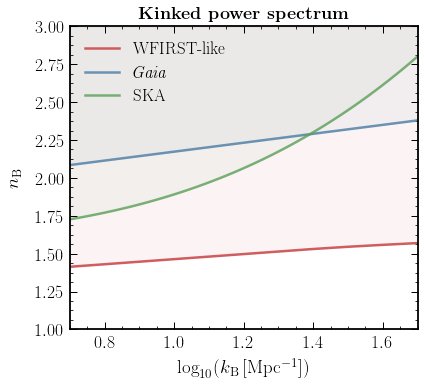

In [14]:
from scipy.interpolate import UnivariateSpline, interp1d
matplotlib.rcParams['figure.figsize'] = 6, 5.5

x, y = np.transpose(CS2.allsegs[0][0])
x, y = x[::-1][7:], y[::-1][7:]
x_pts = np.linspace(0.7, 1.7)
x, y = x_pts, interp1d(x, y, bounds_error=False, fill_value="extrapolate")(x_pts)
plt.plot(x, y, color=cols_default[0], label='WFIRST-like', alpha=0.8)
plt.fill_between(x, y, 3., color=cols_default[0], alpha=0.05)

x, y = np.transpose(CS3.allsegs[0][0])
x, y = [x[::-1][0], x[::-1][-1]], [y[::-1][0], y[::-1][-1]]
x_pts = np.linspace(0.7, 1.7)
x, y = x_pts, interp1d(x, y, bounds_error=False, fill_value="extrapolate")(x_pts)
plt.plot(x, y, color=cols_default[1], label="\emph{Gaia}", alpha=0.8)
plt.fill_between(x, y, 3., color=cols_default[1], alpha=0.05)

x, y = np.transpose(CS1.allsegs[0][0])
x, y = x[::-1], y[::-1]
x_pts = np.linspace(0.7, 1.7)
x, y = x_pts, UnivariateSpline(x, y, )(x_pts)
plt.plot(x, y, color=cols_default[2], label='SKA', alpha=0.8)
plt.fill_between(x, y, 3., color=cols_default[2], alpha=0.05)


plt.xlim(0.7, 1.7)
plt.ylim(1, 3)

plt.xlabel("$\log_{10}(k_\mathrm{B}\,\mathrm{[Mpc^{-1}]})$")
plt.ylabel("$n_\mathrm{B}$")
plt.title('\\textbf{Kinked power spectrum}', fontsize=18)

plt.legend()

plt.tight_layout()
plt.savefig(plots_dir + "kink_PS_sig.pdf")